<a href="https://colab.research.google.com/github/OliviaBurgosBlanco08/Python_Data_Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [108]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [109]:


# Crear columna de facturación (precio + costo de envío)
tienda["Facturación"] = tienda["Precio"] + tienda["Costo de envío"]

# Agrupar por tienda y sumar la facturación
facturacion_por_tienda = tienda.groupby("Lugar de Compra")["Facturación"].sum().sort_values(ascending=False)

# Mostrar resultados
print("Facturación total por tienda:")
print(facturacion_por_tienda)

Facturación total por tienda:
Lugar de Compra
Bogotá           463439800.0
Medellín         312738700.0
Cali             162651900.0
Pereira           59194000.0
Cúcuta            39926100.0
Barranquilla      34685800.0
Cartagena         23495800.0
Riohacha          19487000.0
Bucaramanga       18527400.0
Pasto             15803200.0
Leticia           15452200.0
Santa Marta       13921300.0
Manizales          8464700.0
Villavicencio      7543700.0
Armenia            4858100.0
Soacha             4343100.0
Neiva              3683100.0
Inírida            2864800.0
Valledupar         1177600.0
Name: Facturación, dtype: float64


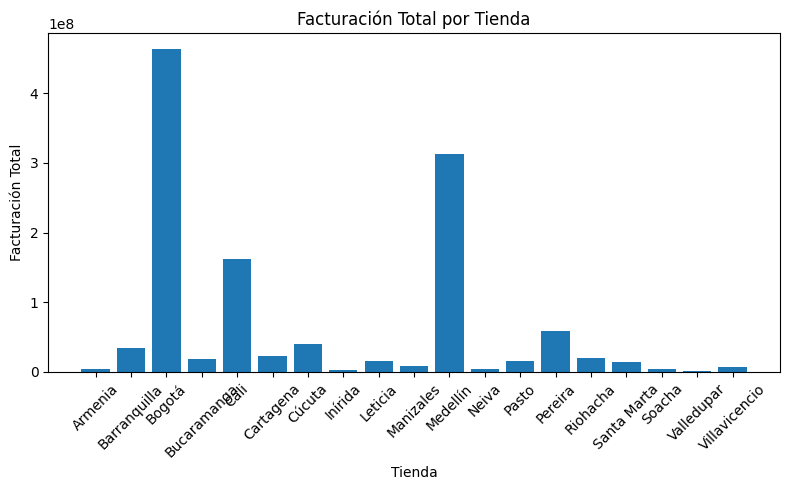

In [110]:
import matplotlib.pyplot as plt

# 1. Asegúrate de tener el DataFrame con la columna 'Facturación' y la etiqueta de tienda:
tienda["Facturación"] = tienda["Precio"] + tienda["Costo de envío"]
tienda["Tienda"] = tienda["Lugar de Compra"]

# 2. Calcula la facturación total por tienda:
facturacion_total = tienda.groupby("Tienda")["Facturación"].sum()

# 3. Dibuja el gráfico de barras:
plt.figure(figsize=(8, 5))
plt.bar(facturacion_total.index, facturacion_total.values)
plt.title("Facturación Total por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [111]:
 # Contar cuántas veces se vendió cada categoría por tienda
ventas_categoria = tienda.groupby(["Lugar de Compra", "Categoría del Producto"]).size().reset_index(name="Cantidad de Ventas")

# Ordenar por tienda y cantidad de ventas
ventas_categoria = ventas_categoria.sort_values(by=["Lugar de Compra", "Cantidad de Ventas"], ascending=[True, False])

# Mostrar el top 1 por tienda (categoría más popular por tienda)
top_categoria_por_tienda = ventas_categoria.groupby("Lugar de Compra").first().reset_index()

print("Categoría más vendida por tienda:")
print(top_categoria_por_tienda)

Categoría más vendida por tienda:
   Lugar de Compra   Categoría del Producto  Cantidad de Ventas
0          Armenia                  Muebles                   4
1     Barranquilla             Electrónicos                  14
2           Bogotá                  Muebles                 195
3      Bucaramanga                 Juguetes                   8
4             Cali             Electrónicos                  67
5        Cartagena                  Muebles                  11
6           Cúcuta             Electrónicos                  13
7          Inírida   Instrumentos musicales                   2
8          Leticia        Electrodomésticos                   9
9        Manizales             Electrónicos                   4
10        Medellín             Electrónicos                 123
11           Neiva                  Muebles                   3
12           Pasto     Deportes y diversión                   5
13         Pereira                  Muebles                  31
14    

# 3. Calificación promedio de la tienda


In [112]:
 # Agrupar por tienda y calcular la media de la calificación
calificacion_promedio = tienda.groupby("Lugar de Compra")["Calificación"].mean().round(2)

# Mostrar resultados
print(" Calificación promedio por tienda:")
print(calificacion_promedio)



 Calificación promedio por tienda:
Lugar de Compra
Armenia          3.36
Barranquilla     3.57
Bogotá           4.09
Bucaramanga      4.39
Cali             3.99
Cartagena        4.04
Cúcuta           3.88
Inírida          4.00
Leticia          4.16
Manizales        3.80
Medellín         3.87
Neiva            4.50
Pasto            4.04
Pereira          3.95
Riohacha         3.45
Santa Marta      3.75
Soacha           4.60
Valledupar       2.67
Villavicencio    4.09
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [113]:
# Contar cuántas veces se vendió cada producto en cada tienda

ventas_productos = tienda.groupby(["Lugar de Compra", "Producto"]).size().reset_index(name="Cantidad de Ventas")

# Obtener los productos más vendidos por tienda
productos_mas_vendidos = ventas_productos.sort_values(["Lugar de Compra", "Cantidad de Ventas"], ascending=[True, False])
top_mas_vendidos = productos_mas_vendidos.groupby("Lugar de Compra").first().reset_index()

# Obtener los productos menos vendidos por tienda
productos_menos_vendidos = ventas_productos.sort_values(["Lugar de Compra", "Cantidad de Ventas"], ascending=[True, True])
top_menos_vendidos = productos_menos_vendidos.groupby("Lugar de Compra").first().reset_index()

# Mostrar resultados
print("Productos más vendidos por tienda:")
print(top_mas_vendidos)

print("\n Productos menos vendidos por tienda:")
print(top_menos_vendidos)



Productos más vendidos por tienda:
   Lugar de Compra                   Producto  Cantidad de Ventas
0          Armenia           Silla de oficina                   2
1     Barranquilla                 Cubertería                   4
2           Bogotá               Vaso térmico                  30
3      Bucaramanga        Balón de baloncesto                   3
4             Cali               Refrigerador                  10
5        Cartagena           Silla de oficina                   4
6           Cúcuta                  Iphone 15                   4
7          Inírida  Auriculares con micrófono                   1
8          Leticia                     Estufa                   4
9        Manizales                   Smart TV                   2
10        Medellín                Auriculares                  19
11           Neiva                    Armario                   1
12           Pasto           Lavadora de ropa                   3
13         Pereira                    Arm

# 5. Envío promedio por tienda

In [114]:
# Calcular el costo promedio de envío por tienda (Lugar de Compra)
costo_envio_por_tienda = tienda.groupby("Lugar de Compra")["Costo de envío"].mean().round(2).reset_index()

print("Costo promedio de envío por tienda:")
print(costo_envio_por_tienda)


Costo promedio de envío por tienda:
   Lugar de Compra  Costo de envío
0          Armenia        17314.29
1     Barranquilla        23708.00
2           Bogotá        23815.85
3      Bucaramanga        30587.10
4             Cali        28827.56
5        Cartagena        22624.53
6           Cúcuta        40129.41
7          Inírida        28460.00
8          Leticia        24450.00
9        Manizales        29140.00
10        Medellín        28207.10
11           Neiva        31516.67
12           Pasto        35078.26
13         Pereira        22403.76
14        Riohacha        24357.50
15     Santa Marta        22593.75
16          Soacha        43420.00
17      Valledupar        18766.67
18   Villavicencio        34709.09


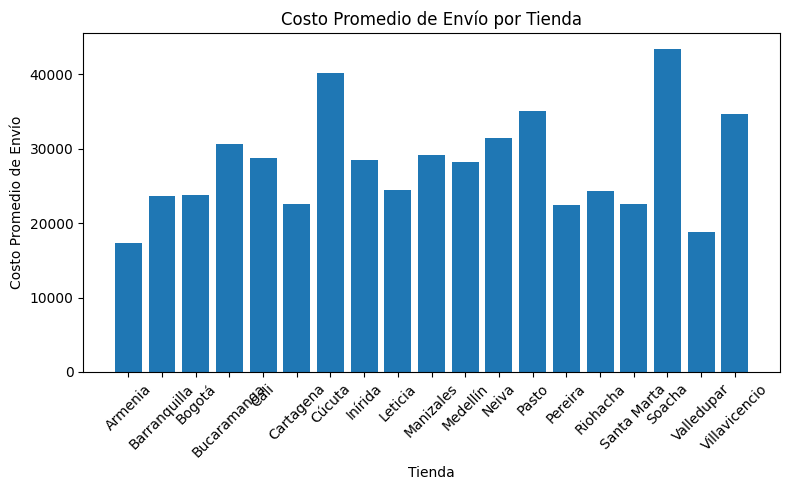

In [115]:
import matplotlib.pyplot as plt

# 1. Calcula el costo promedio de envío por tienda
envio_prom = tienda.groupby("Tienda")["Costo de envío"].mean().round(2)

# 2. Dibuja el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(envio_prom.index, envio_prom.values)
plt.title("Costo Promedio de Envío por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio de Envío")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [119]:
# CONCLUSIÓN FINAL
print("\n==========CONCLUSIÓN:==========")
print("""
La tienda con menor desempeño en los 5 factores clave es **Valledupar**:

====Facturación total====

-Valledupar: $1 177 600
-(Inírida --la --segunda-- mas-- baja -- factura $2 864 800 — ¡más del doble!

-Volumen de ventas:
Sólo 2 ventas en su categoría top y 1 venta en su producto top.
Las demás tiendas registran decenas o centenas de transacciones.

-Calificación promedio:
Valledupar: 2.67 (la más baja de las cuatro)
Las otras oscilan entre 3.87 (Medellín) y 4.09 (Bogotá).

-Productos más/menos vendidos:
El único producto (Auriculares) vendió 1 unidad y es también el “menos vendido” (empatado).
Ninguna otra tienda tiene un “top” con un solo ejemplar.

-Costo de envío promedio:
Valledupar: $18 766,67 (moderado), pero al compararlo con su escasa demanda no compensa.

****Conclusión cuantitativa:****
*Facturación: 4× menor que la segunda peor.
*Calidad percibida (rating) muy por debajo de 3 estrellas.
*Demanda casi nula.

Todos estos datos convergen en que Valledupar es la más débil y, por tanto,
 la tienda que menos aporte de lucro genera. Venderla liberaría recursos para
  focalizarte en mercados con mejor desempeño.


 Recomendación: El Sr. Juan debería considerar vender la tienda de Valledupar para
 reinvertir en su nuevo negocio.
""")


==========CONCLUSIÓN:==========

La tienda con menor desempeño en los 5 factores clave es **Valledupar**:

====Facturación total====

-Valledupar: $1 177 600
-(Inírida la segunda mas baja -- factura $2 864 800 — ¡más del doble!

-Volumen de ventas:
Sólo 2 ventas en su categoría top y 1 venta en su producto top.
Las demás tiendas registran decenas o centenas de transacciones.

-Calificación promedio:
Valledupar: 2.67 (la más baja de las cuatro)
Las otras oscilan entre 3.87 (Medellín) y 4.09 (Bogotá).

-Productos más/menos vendidos:
El único producto (Auriculares) vendió 1 unidad y es también el “menos vendido” (empatado).
Ninguna otra tienda tiene un “top” con un solo ejemplar.

-Costo de envío promedio:
Valledupar: $18 766,67 (moderado), pero al compararlo con su escasa demanda no compensa.

****Conclusión cuantitativa:****
*Facturación: 4× menor que la segunda peor.
*Calidad percibida (rating) muy por debajo de 3 estrellas.
*Demanda casi nula.

Todos estos datos convergen en que Vall